In [1]:
# load pandas
import pandas as pd
# load pyplot
from matplotlib import pyplot as plt
# import zeros from numpy
import numpy as np

In [2]:
#Load data from L3, OPAL and TPC collaborations
L3_data = pd.read_csv("gammagammaSigma_L3_raw.txt", sep = '\t')
OPAL_data = pd.read_csv("gammagammaSigma_OPAL_raw.txt", sep = '\t')
TPC_data = pd.read_csv("gammagammaSigma_TPC_raw.txt", sep = '\t')

In [3]:
L3_data

,W(GeV),sigma(nb),deltaSigma(nb),deltaSigmaExp(nb),deltaSigmaPHOJET(nb),deltaSigmaPHYTIA(nb),scaleUncertainty(%)
0,6.7,397.2,0.5,30,28,-28,5
1,12.3,365.2,0.4,19,4,-4,5
2,22.7,354.4,0.5,12,-14,14,5
3,37.8,374.8,0.8,8,-26,26,5
4,54.8,411.5,1.1,7,-37,37,5
5,80.2,470.3,1.4,13,-49,49,5
6,120.4,572.0,3.3,53,-89,89,5
7,158.7,734.1,8.7,102,-202,202,5


In [4]:
OPAL_data

,Wmin(GeV),Wmax(GeV),sigma(nb),Errorp,Errorm
0,10,20,362,38,35
1,20,35,372,40,40
2,35,55,414,42,41
3,55,80,439,45,41
4,80,110,464,76,62


In [5]:
TPC_data

,W(GeV),Wmin(GeV),Wmax(GeV),sigma(nb),Errorp,Errorm
0,2.5,2.0,3.0,471.0,12.0,12.0
1,3.5,3.0,4.0,479.0,16.0,16.0
2,5.0,4.0,6.0,408.0,16.0,16.0
3,7.0,6.0,8.0,331.0,24.0,24.0
4,9.0,8.0,10.0,391.0,24.0,24.0


In [6]:
# Make OPAL table be like TPC_data
OPAL_data.insert(0,"W(GeV)",0.5*(OPAL_data["Wmin(GeV)"]+OPAL_data["Wmax(GeV)"]))
# Compute Upper WError and Lower WError and add this columns to OPAL_data
OPAL_data.insert(1,"WErrorp", OPAL_data["Wmax(GeV)"]-OPAL_data["W(GeV)"])
OPAL_data.insert(2,"WErrorm", OPAL_data["W(GeV)"]-OPAL_data["Wmin(GeV)"])
# Drop the columns with the minimum and maximum value of W
OPAL_data = OPAL_data.drop(columns=['Wmin(GeV)', 'Wmax(GeV)'])
# Repeat last three steps to TPC_data
TPC_data.insert(1,"WErrorp", TPC_data["Wmax(GeV)"]-TPC_data["W(GeV)"])
TPC_data.insert(2,"WErrorm", TPC_data["W(GeV)"]-TPC_data["Wmin(GeV)"])
TPC_data = TPC_data.drop(columns=['Wmin(GeV)', 'Wmax(GeV)'])

In [7]:
# L3 data processing
L3_processed = pd.DataFrame({"W(GeV)": L3_data["W(GeV)"],
                           "WErrorp": np.zeros(len(L3_data["W(GeV)"])),
                           "WErrorm": np.zeros(len(L3_data["W(GeV)"])),
                           "sigma(nb)":L3_data["sigma(nb)"]})
deltaSigma = L3_data["deltaSigma(nb)"]**2+L3_data["deltaSigmaExp(nb)"]**2
deltaSigma += (0.05*L3_data["sigma(nb)"])**2
deltaSigma = np.sqrt(deltaSigma)
L3_processed["Errorp"] = deltaSigma
L3_processed["Errorm"] = deltaSigma
# L3 data with PHOJET unfolding
L3_data_PHOJET = pd.DataFrame({"W(GeV)" : L3_data["W(GeV)"],
                              "WErrorp": np.zeros(len(L3_data["W(GeV)"])),
                              "WErrorm": np.zeros(len(L3_data["W(GeV)"])),
                              "sigma(nb)": L3_data["sigma(nb)"] + L3_data["deltaSigmaPHOJET(nb)"]})
# Compute the uncertainty related with PHOJET unfolding result
deltaSigma_PHOJET = L3_data["deltaSigma(nb)"]**2+L3_data["deltaSigmaExp(nb)"]**2
deltaSigma_PHOJET += (0.05*L3_data_PHOJET["sigma(nb)"])**2
deltaSigma_PHOJET = np.sqrt(deltaSigma_PHOJET)
L3_data_PHOJET["Errorp"] = deltaSigma_PHOJET
L3_data_PHOJET["Errorm"] = deltaSigma_PHOJET
# L3 data with PHYTIA unfolding
L3_data_PHYTIA = pd.DataFrame({"W(GeV)" : L3_data["W(GeV)"],
                              "WErrorp": np.zeros(len(L3_data["W(GeV)"])),
                              "WErrorm": np.zeros(len(L3_data["W(GeV)"])),
                              "sigma(nb)": L3_data["sigma(nb)"] + L3_data["deltaSigmaPHYTIA(nb)"]})
# Compute the uncertainty related with PHYTIA unfolding result
deltaSigma_PHYTIA = L3_data["deltaSigma(nb)"]**2+L3_data["deltaSigmaExp(nb)"]**2
deltaSigma_PHYTIA += (0.05*L3_data_PHYTIA["sigma(nb)"])**2
deltaSigma_PHYTIA = np.sqrt(deltaSigma_PHYTIA)
L3_data_PHYTIA["Errorp"] = deltaSigma_PHYTIA
L3_data_PHYTIA["Errorm"] = deltaSigma_PHYTIA

In [13]:
def plotGammaGammaSigma(data_list, data_list_labels):
    """
        Makes a plot of the experimental points contained in data_list.
        data_list is a list of pandas DataFrames.
        Each DataFrame has the columns 'W(GeV)', 'WErrorp', 'WErrorm', 'sigma(nb)', 'Errorp', 'Errorm'
        W(GeV) is the independent variable and sigma(nb) is the dependent variable
        WErrorp and WErrorm specify the range of the independent variable.
        Errorp and Errorm specify the range of the dependent variable.
        data_list_labels: list of strings that specify the source of data in each DataFrame contained in data_list
    """
    # n is the number of data_frames in data_list
    n = len(data_list)
    for i in range(n):
        # For each dataset make the error bar plot
        plt.errorbar(data_list[i]["W(GeV)"], data_list[i]["sigma(nb)"], 
                     xerr = [data_list[i]["WErrorm"],data_list[i]["WErrorp"]],
                     yerr = [data_list[i]["Errorm"],data_list[i]["Errorp"]],
                     fmt='o',label = data_list_labels[i])
    # Add labels
    plt.xlabel("W(GeV)")
    plt.ylabel(r'$\sigma(\gamma\gamma \to hadrons)$(nb)')
    plt.ylim(250,1400)
    plt.legend(loc = "upper left")
    plt.show()    

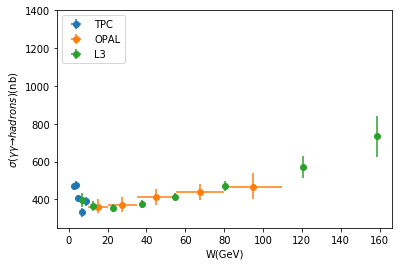

In [14]:
plotGammaGammaSigma([TPC_data, OPAL_data, L3_processed], ["TPC", "OPAL", "L3"])

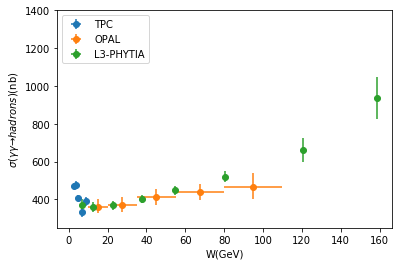

In [15]:
plotGammaGammaSigma([TPC_data, OPAL_data, L3_data_PHYTIA], ["TPC", "OPAL", "L3-PHYTIA"])

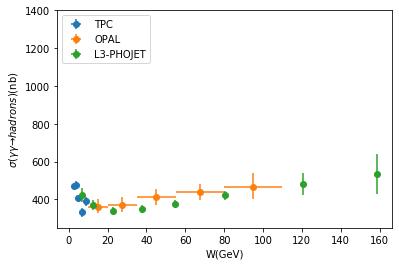

In [16]:
plotGammaGammaSigma([TPC_data, OPAL_data, L3_data_PHOJET], ["TPC", "OPAL", "L3-PHOJET"])

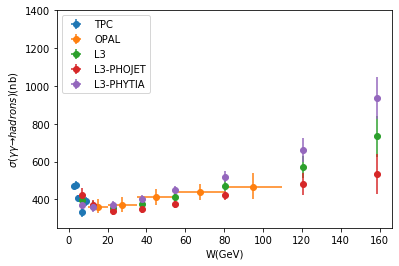

In [17]:
plotGammaGammaSigma([TPC_data, OPAL_data, L3_processed, L3_data_PHOJET, L3_data_PHYTIA],
                    ["TPC", "OPAL", "L3", "L3-PHOJET", "L3-PHYTIA"])

In [ ]:
def sigmaSoftPomeron(W, a, b):
    """
        Computes the total cross section of gamma gamma -> Hadrons
        using the Soft Pomeron Kernel of arXiv:1508.00008.
        The cross section is given by a s^(j0 - 1) + b * s^(j1 - 1),
        where j0 and j1 are the intercepts of the first and second
        Regge trajectories of the Soft Pomeron Kerne and s = W^2
    """
    # Define the intercepts of the Soft Pomeron Kernel
    j0 = 0 
    j1 = 0
    # s = W^2
    s = W^2
    sigma = a * s ** (j0 - 1) + b * s ** (j1 -1)
    return sigma